In [208]:
import pandas as pd  # 데이터 조작 및 분석을 위한 라이브러리
from sklearn.model_selection import train_test_split  # 데이터를 학습 및 테스트 세트로 나누기 위한 함수
from sklearn.ensemble import RandomForestClassifier  # Random Forest 알고리즘
from sklearn.metrics import accuracy_score, classification_report

In [209]:
data = pd.read_csv('mushroom.csv', na_values = ['?'])

In [210]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                5644 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [211]:
data['class'] = data['class'].apply(lambda x: 1 if x == 'p' else 0)

In [212]:
from sklearn.preprocessing import LabelEncoder

Encoder_y = LabelEncoder()
y = Encoder_y.fit_transform(y)

In [213]:
Encoder_y.classes_

array([0, 1], dtype=int64)

In [214]:
data = data.drop(['stalk-root'], axis = 1)

In [215]:
data_encoded = pd.get_dummies(data)

data_encoded

,class,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,1,0,0,0,0,0,1,0,0,1,...,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
3,1,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
8120,0,0,0,0,0,0,1,0,0,1,...,0,1,0,0,0,1,0,0,0,0
8121,0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
8122,1,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0


In [216]:
X = data_encoded.drop('class', axis=1)  # 독립 변수
y = data_encoded['class']

In [217]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
print(X_train.shape, y_train.shape)

(5686, 112) (5686,)


In [218]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(max_depth = 3)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [219]:
score = model.score(X_test, y_test)
print("정확도 : ", score)

정확도 :  0.9606234618539786


피처 중요도 : 
 [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.17797116 0.         0.         0.
 0.         0.         0.         0.69951019 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01468388 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.07124306 0.         0.         0.         0.03659171
 0.         0.         0.         0. 

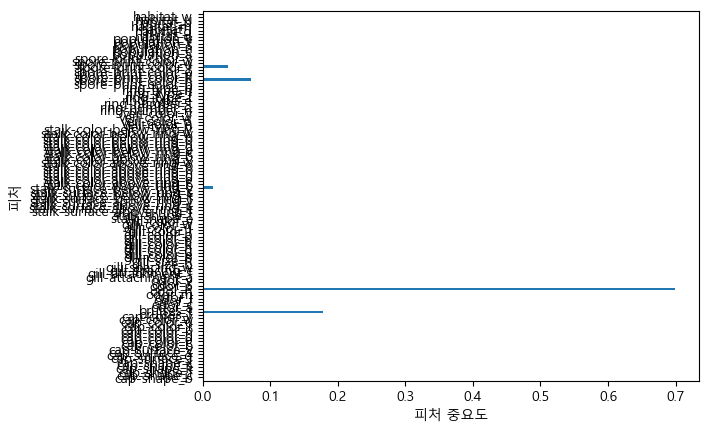

In [220]:
import numpy as np
import matplotlib.pyplot as plt

print("피처 중요도 : \n", model.feature_importances_)

plt.rcParams["font.family"] = 'Malgun Gothic'
n_features = X_train.shape[1]
plt.barh(np.arange(n_features), model.feature_importances_, align = "center")
plt.yticks(np.arange(n_features), X_train.columns)
plt.xlabel("피처 중요도")
plt.ylabel("피처")
plt.ylim(-1, n_features)
plt.show()

In [221]:
forest = RandomForestClassifier(n_estimators = 50, criterion = 'entropy', random_state = 42)
forest.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=50, random_state=42)

In [222]:
y_pred = forest.predict(X_test)
y_pred

array([0, 1, 1, ..., 1, 0, 0], dtype=int64)

In [223]:
print("정확도 : ", metrics.accuracy_score(y_test, y_pred))

정확도 :  1.0


In [224]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1257
           1       1.00      1.00      1.00      1181

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



odor_n                        0.124231
gill-size_n                   0.075001
stalk-surface-above-ring_k    0.059708
gill-size_b                   0.051967
odor_f                        0.050716
dtype: float64


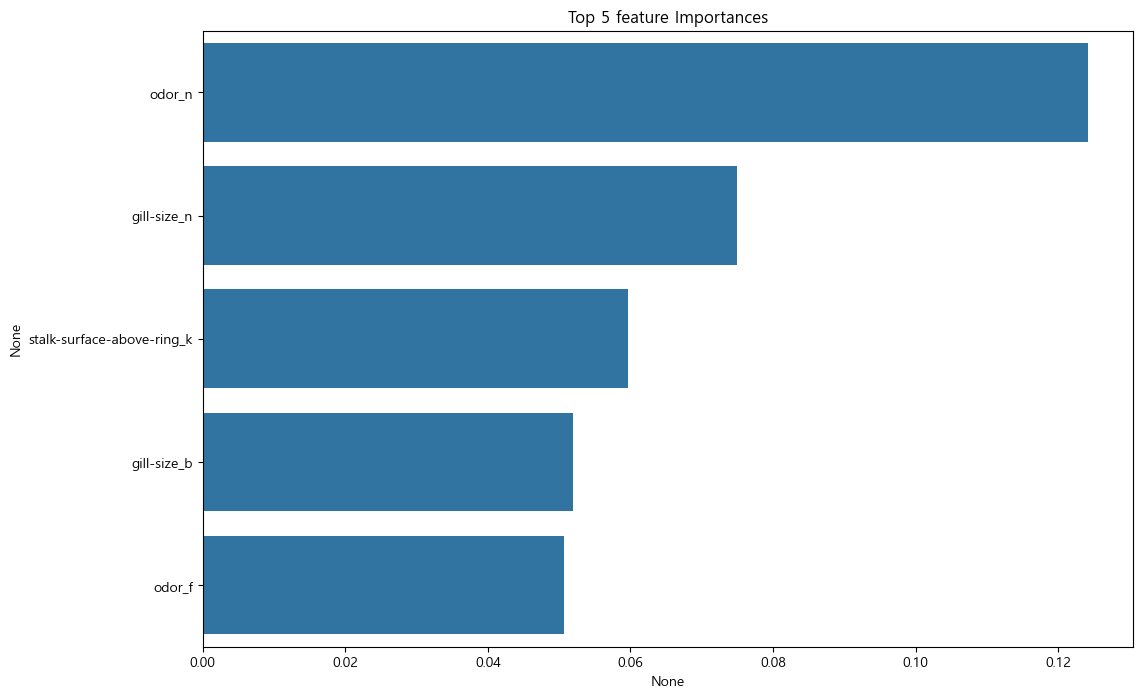

In [225]:
import matplotlib.pyplot as plt
import seaborn as sns

feature_importances_values = forest.feature_importances_
feature_importances = pd.Series(feature_importances_values, index = X_train.columns)
feature_top5 = feature_importances.sort_values(ascending = False)[:5]
print(feature_top5)

plt.figure(figsize = (12, 8))
plt.title("Top 5 feature Importances")
sns.barplot(x = feature_top5, y = feature_top5.index)
plt.show()

In [226]:
from sklearn.ensemble import RandomForestRegressor

reg = RandomForestRegressor(
    n_estimators = 50,
    criterion = 'squared_error',
    max_depth = 4,
    max_features = 1/3,
    max_samples = 1.0,
    bootstrap = True,
    random_state = 100
).fit(X, y)


In [227]:
print(reg.predict(X)[:3])
print('정확도 : ', reg.score(X, y)) # r2score - 결정계수
print(reg.feature_importances_)

[0.83538625 0.06496704 0.06499645]
정확도 :  0.9731143146885063
[2.20389415e-03 3.22137703e-05 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 4.00199733e-03 0.00000000e+00
 0.00000000e+00 0.00000000e+00 3.13890466e-04 2.39506620e-04
 0.00000000e+00 0.00000000e+00 0.00000000e+00 5.62390835e-05
 0.00000000e+00 0.00000000e+00 1.39955825e-03 3.98205015e-03
 3.36037383e-02 2.41663100e-02 1.17020068e-02 4.95104294e-03
 1.43001917e-01 9.71595464e-03 1.02469837e-03 2.91140746e-01
 1.25854571e-02 3.69629566e-03 4.25161463e-03 0.00000000e+00
 0.00000000e+00 9.92624838e-03 9.08528493e-03 3.74287151e-02
 1.05893169e-01 4.96938854e-02 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 2.37663038e-03 1.30938575e-04 0.00000000e+00
 0.00000000e+00 2.38559481e-03 6.50729736e-03 0.00000000e+00
 2.81412034e-02 9.82144829e-03 0.00000000e+00 2.31169420e-03
 6.94156089e-02 1.00707859e-02 3.61826833e-03 0.00000000e+00
 1.00357377e-03 0.000000